In [ ]:
from google.colab import files

uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')

def entropy(column):
    class_counts = column.value_counts()

    probabilities = class_counts / len(column)

    entropy = -sum(probabilities * np.log2(probabilities))

    return entropy

def information_gain(data, attribute_name, class_name):
    total_entropy = entropy(data[class_name])

    weighted_average_entropy = 0
    unique_values = data[attribute_name].unique()

    for value in unique_values:
        subset = data[data[attribute_name] == value]
        weighted_average_entropy += (len(subset) / len(data)) * entropy(subset[class_name])

    info_gain = total_entropy - weighted_average_entropy

    return info_gain

attribute_information_gain = {}
class_name = 'buys_computer'
for column in df.columns:
    if column != class_name:
        ig = information_gain(df, column, class_name)
        attribute_information_gain[column] = ig

root_node = max(attribute_information_gain, key=attribute_information_gain.get)

for attribute, ig in attribute_information_gain.items():
    print(f'{attribute}: {ig}')

print(f'Root Node (based on Information Gain): {root_node}')


age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949
Root Node (based on Information Gain): age


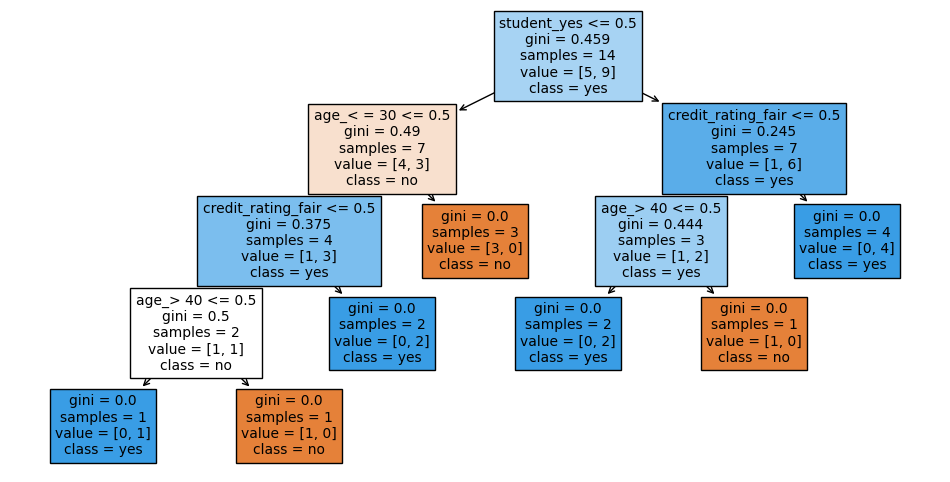

Depth of the Decision Tree: 4


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('data.csv')

X = df.drop(columns=['buys_computer'])
y = df['buys_computer']

non_numeric_columns = [col for col in X.columns if X[col].dtype == 'object']

X_encoded = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)

label_encoder = LabelEncoder()
for column in X_encoded.columns:
    if X_encoded[column].dtype == 'object':
        X_encoded[column] = label_encoder.fit_transform(X_encoded[column])

clf = DecisionTreeClassifier(random_state=42)


clf.fit(X_encoded, y)

plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=y.unique(), fontsize=10)
plt.show()

clf.fit(X_encoded, y)
tree_depth = clf.get_depth()
print(f"Depth of the Decision Tree: {tree_depth}")




In [ ]:
from google.colab import files

uploaded = files.upload()


Saving mushrooms.csv to mushrooms (1).csv


Missing Values:
 class                       1
cap-shape                   1
cap-surface                 1
cap-color                   1
bruises                     1
odor                        1
gill-attachment             1
gill-spacing                1
gill-size                   1
gill-color                  1
stalk-shape                 1
stalk-root                  1
stalk-surface-above-ring    1
stalk-surface-below-ring    1
stalk-color-above-ring      1
stalk-color-below-ring      1
veil-type                   1
veil-color                  1
ring-number                 1
ring-type                   1
spore-print-color           1
population                  1
habitat                     1
dtype: int64
Training Set Accuracy: 1.0
Test Set Accuracy: 1.0


[Text(0.6111111111111112, 0.9375, 'odor_n <= 0.5\ngini = 0.499\nsamples = 6500\nvalue = [3370, 1, 3129]\nclass = p'),
 Text(0.3888888888888889, 0.8125, 'stalk-root_c <= 0.5\ngini = 0.284\nsamples = 3660\nvalue = [627, 1, 3032]\nclass = missing'),
 Text(0.2777777777777778, 0.6875, 'stalk-surface-below-ring_y <= 0.5\ngini = 0.124\nsamples = 3214\nvalue = [213, 1, 3000]\nclass = missing'),
 Text(0.2222222222222222, 0.5625, 'odor_a <= 0.5\ngini = 0.045\nsamples = 3070\nvalue = [69, 1, 3000]\nclass = missing'),
 Text(0.16666666666666666, 0.4375, 'odor_l <= 0.5\ngini = 0.023\nsamples = 3035\nvalue = [34, 1, 3000]\nclass = missing'),
 Text(0.1111111111111111, 0.3125, 'stalk-surface-above-ring_missing <= 0.5\ngini = 0.001\nsamples = 3001\nvalue = [0, 1, 3000]\nclass = missing'),
 Text(0.05555555555555555, 0.1875, 'gini = 0.0\nsamples = 3000\nvalue = [0, 0, 3000]\nclass = missing'),
 Text(0.16666666666666666, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = e'),
 Text(0.222222222222

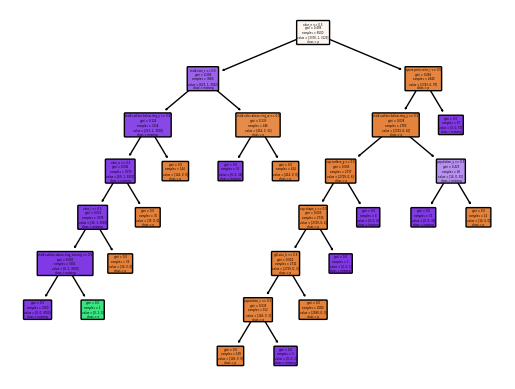

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Load the mushrooms.csv dataset
df = pd.read_csv('mushrooms.csv')

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values by filling them with a specific value (e.g., 'missing')
df.fillna('missing', inplace=True)

# Separate the target variable ('class') and features
X = df.drop(columns=['class'])
y = df['class']

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(Tr_X, Tr_y)

# Calculate and print the training set accuracy
train_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", train_accuracy)

# Calculate and print the test set accuracy
test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy:", test_accuracy)
# Determine the unique class labels in the target variable
unique_classes = df['class'].unique()
# Plot the Decision Tree with correct class names
plot_tree(model, filled=True, feature_names=X_encoded.columns, class_names=unique_classes, rounded=True)







Missing Values:
 class                       1
cap-shape                   1
cap-surface                 1
cap-color                   1
bruises                     1
odor                        1
gill-attachment             1
gill-spacing                1
gill-size                   1
gill-color                  1
stalk-shape                 1
stalk-root                  1
stalk-surface-above-ring    1
stalk-surface-below-ring    1
stalk-color-above-ring      1
stalk-color-below-ring      1
veil-type                   1
veil-color                  1
ring-number                 1
ring-type                   1
spore-print-color           1
population                  1
habitat                     1
dtype: int64
Training Set Accuracy (Max Depth Constraint): 0.9993846153846154
Test Set Accuracy (Max Depth Constraint): 1.0


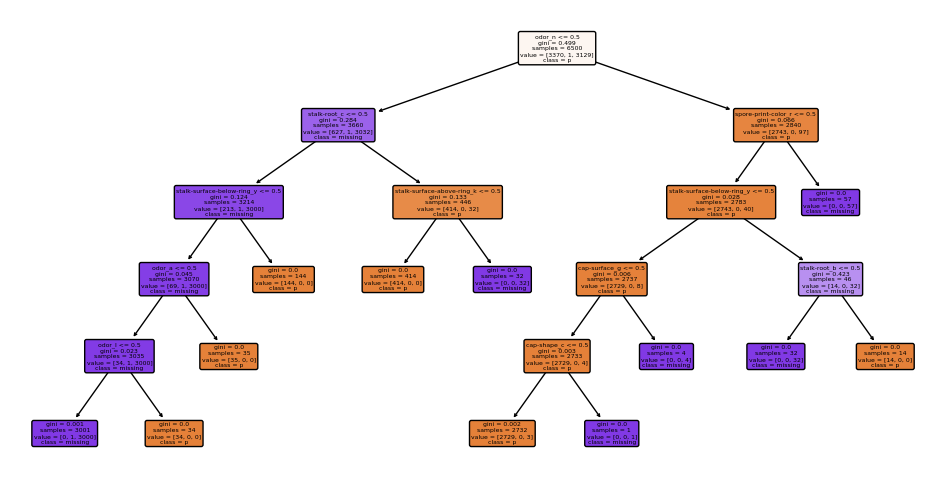

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the mushrooms.csv dataset
df = pd.read_csv('mushrooms.csv')

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values by filling them with a specific value (e.g., 'missing')
df.fillna('missing', inplace=True)

# Separate the target variable ('class') and features
X = df.drop(columns=['class'])
y = df['class']

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier with max_depth constraint
model_max_depth = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model on the training data with max_depth constraint
model_max_depth.fit(Tr_X, Tr_y)

# Calculate and print the training set accuracy with max_depth constraint
train_accuracy_max_depth = model_max_depth.score(Tr_X, Tr_y)
print("Training Set Accuracy (Max Depth Constraint):", train_accuracy_max_depth)

# Calculate and print the test set accuracy with max_depth constraint
test_accuracy_max_depth = model_max_depth.score(Te_X, Te_y)
print("Test Set Accuracy (Max Depth Constraint):", test_accuracy_max_depth)

# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(12, 6))
plot_tree(model_max_depth, filled=True, feature_names=X_encoded.columns, class_names=df['class'].unique(), rounded=True)
plt.show()


Missing Values:
 class                       1
cap-shape                   1
cap-surface                 1
cap-color                   1
bruises                     1
odor                        1
gill-attachment             1
gill-spacing                1
gill-size                   1
gill-color                  1
stalk-shape                 1
stalk-root                  1
stalk-surface-above-ring    1
stalk-surface-below-ring    1
stalk-color-above-ring      1
stalk-color-below-ring      1
veil-type                   1
veil-color                  1
ring-number                 1
ring-type                   1
spore-print-color           1
population                  1
habitat                     1
dtype: int64
Training Set Accuracy (Entropy Criterion): 1.0
Test Set Accuracy (Entropy Criterion): 1.0


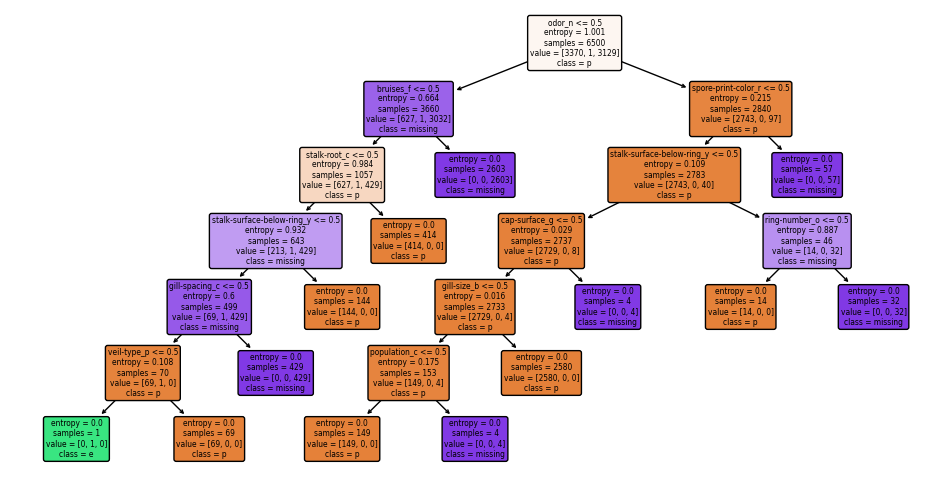

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the mushrooms.csv dataset
df = pd.read_csv('mushrooms.csv')

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values by filling them with a specific value (e.g., 'missing')
df.fillna('missing', inplace=True)

# Separate the target variable ('class') and features
X = df.drop(columns=['class'])
y = df['class']

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier with "Entropy" criterion
model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Fit the model on the training data with "Entropy" criterion
model_entropy.fit(Tr_X, Tr_y)

# Calculate and print the training set accuracy with "Entropy" criterion
train_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
print("Training Set Accuracy (Entropy Criterion):", train_accuracy_entropy)

# Calculate and print the test set accuracy with "Entropy" criterion
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)
print("Test Set Accuracy (Entropy Criterion):", test_accuracy_entropy)

# Plot the Decision Tree with "Entropy" criterion
plt.figure(figsize=(12, 6))
plot_tree(model_entropy, filled=True, feature_names=X_encoded.columns, class_names=df['class'].unique(), rounded=True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the mushrooms.csv dataset
df = pd.read_csv('mushrooms.csv')

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values by filling them with a specific value (e.g., 'missing')
df.fillna('missing', inplace=True)

# Separate the target variable ('class') and features
X = df.drop(columns=['class'])
y = df['class']

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the training data
decision_tree_model.fit(Tr_X, Tr_y)

# Make predictions on the test set using the Decision Tree model
decision_tree_predictions = decision_tree_model.predict(Te_X)

# Evaluate the Decision Tree model
decision_tree_accuracy = accuracy_score(Te_y, decision_tree_predictions)
decision_tree_classification_report = classification_report(Te_y, decision_tree_predictions)

print("Decision Tree Classifier Results:")
print("Accuracy:", decision_tree_accuracy)
print("Classification Report:\n", decision_tree_classification_report)

# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the Random Forest model on the training data
random_forest_model.fit(Tr_X, Tr_y)

# Make predictions on the test set using the Random Forest model
random_forest_predictions = random_forest_model.predict(Te_X)

# Evaluate the Random Forest model
random_forest_accuracy = accuracy_score(Te_y, random_forest_predictions)
random_forest_classification_report = classification_report(Te_y, random_forest_predictions)

print("\nRandom Forest Classifier Results:")
print("Accuracy:", random_forest_accuracy)
print("Classification Report:\n", random_forest_classification_report)


Missing Values:
 class                       1
cap-shape                   1
cap-surface                 1
cap-color                   1
bruises                     1
odor                        1
gill-attachment             1
gill-spacing                1
gill-size                   1
gill-color                  1
stalk-shape                 1
stalk-root                  1
stalk-surface-above-ring    1
stalk-surface-below-ring    1
stalk-color-above-ring      1
stalk-color-below-ring      1
veil-type                   1
veil-color                  1
ring-number                 1
ring-type                   1
spore-print-color           1
population                  1
habitat                     1
dtype: int64
Decision Tree Classifier Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       838
           p       1.00      1.00      1.00       787

    accuracy                           1.00 